<a href="https://colab.research.google.com/github/patelruday/Machine_learning/blob/main/supervised_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

In [ ]:
df=pd.read_csv("diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Outcome
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

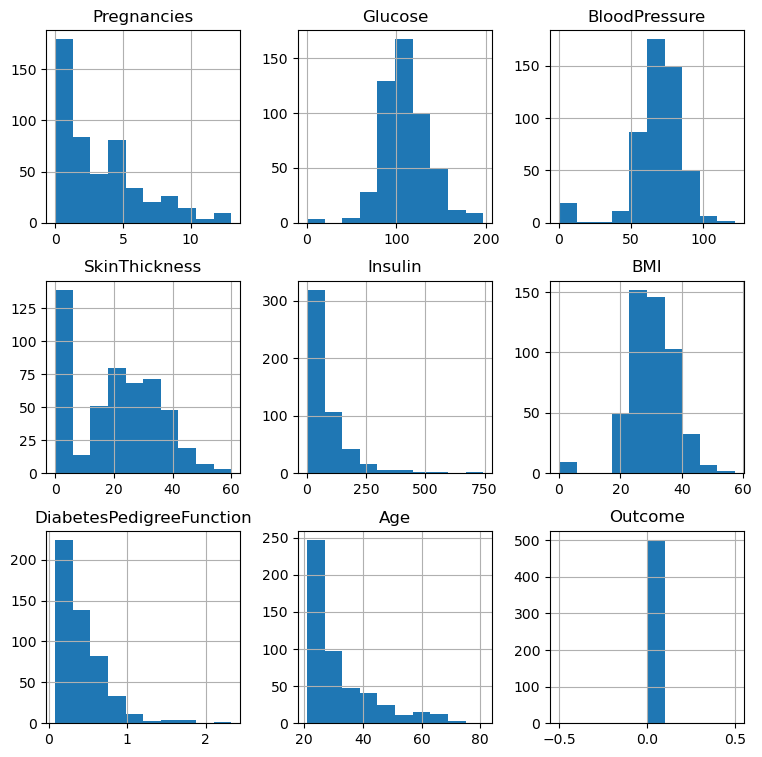

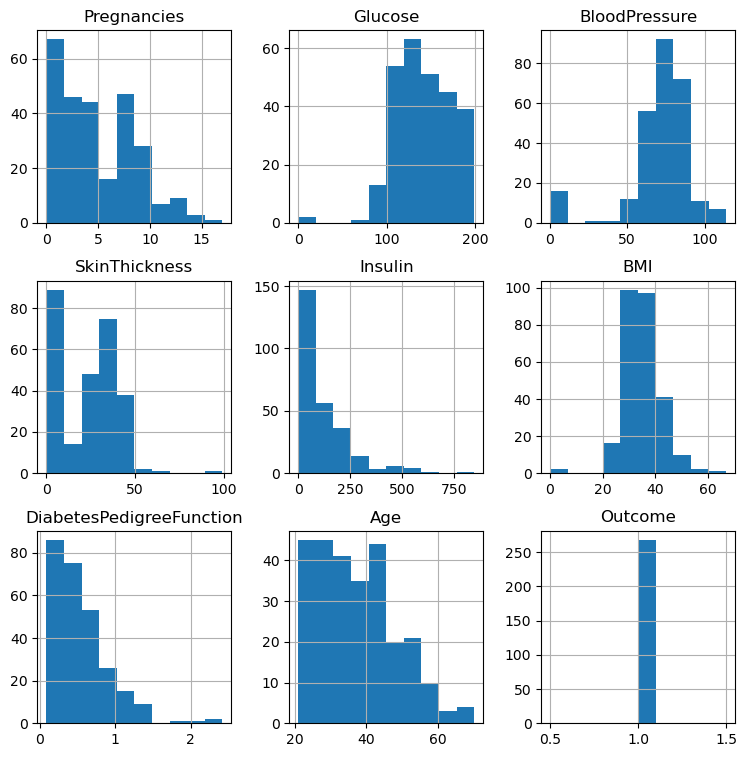

In [ ]:
df.groupby(['Outcome']).hist(figsize=(9,9))

In [ ]:
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

(724, 9)


In [ ]:
X = df_mod.iloc[:, :8]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
y = df_mod["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)


In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_sc=scaler.fit_transform(X_train)

In [ ]:
X_test_sc=scaler.transform(X_test)

In [ ]:
svc=SVC()

In [ ]:
svc.fit(X_train_sc,y_train)

SVC()

In [ ]:
y_pred=svc.predict(X_test_sc)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        97
           1       0.63      0.71      0.67        48

    accuracy                           0.77       145
   macro avg       0.74      0.75      0.74       145
weighted avg       0.77      0.77      0.77       145



In [ ]:
print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_sc, y_test)))

Accuracy on training set: 0.832
Accuracy on test set: 0.766


In [ ]:
#Tunning C parameter

In [ ]:
C = .9  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C)
svc.fit(X_train_sc, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_sc, y_test)))

Accuracy on training set: 0.775
Accuracy on test set: 0.779


In [ ]:
#tunning gamma

In [ ]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.01, C=C)
rbf_svc.fit(X_train_sc, y_train)

print("Accuracy on training set: {:.3f}".format(
    rbf_svc.score(X_train_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(rbf_svc.score(X_test_sc, y_test)))

Accuracy on training set: 0.782
Accuracy on test set: 0.786


In [ ]:
C = 1.0  # SVM regularization parameter
poly_svc = svm.SVC(kernel='poly', degree=3, C=C)
poly_svc.fit(X_train_sc, y_train)

print("Accuracy on training set: {:.3f}".format(
    poly_svc.score(X_train_sc, y_train)))
print("Accuracy on test set: {:.3f}".format(poly_svc.score(X_test_sc, y_test)))

Accuracy on training set: 0.803
Accuracy on test set: 0.759


In [ ]:
#diagnosing new patient

In [ ]:
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(X_train_sc, y_train)
    y_pred = model.predict(X_train_sc)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.7772020725388601
poly
0.8031088082901554
rbf
0.8324697754749568
sigmoid
0.694300518134715


In [ ]:
#Using the best model#
model = svm.SVC(kernel='rbf')
model.fit(X_train_sc, y_train)

SVC()

In [ ]:
YHat = model.predict(X_test_sc)
print (round(accuracy_score(y_test, YHat)*100,2))

76.55


In [ ]:
print(classification_report(y_test,YHat))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        97
           1       0.63      0.71      0.67        48

    accuracy                           0.77       145
   macro avg       0.74      0.75      0.74       145
weighted avg       0.77      0.77      0.77       145

